In [ ]:
Data Visualization

Objectives

Visualize the distribution of data.

Visualize the relationship between two features.

Visualize composition and comparison of data.

In [2]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(url)

# Display the first few rows to confirm it's loaded
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [ ]:
Create a SQLite Database and Insert the Data

In [4]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


In [ ]:
Verify the Data in the SQLite Database 

In [5]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

In [ ]:
Demo: Running an SQL Query

In [6]:
# Count the number of rows in the table named 'main'
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()

,COUNT(*)
0,65437


In [ ]:
Demo: Listing All Tables
To view the names of all tables in the database:

In [7]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)

,Table_Name
0,main


In [ ]:
Demo: Running a Group By Query
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:

In [8]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


In [ ]:
Demo: Describing a table
Use this query to get the schema of a specific table, main in this case:

In [9]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])

CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


In [ ]:
Hands-on Lab

In [ ]:
Visualizing the Distribution of Data
Histograms

Plot a histogram of CompTotal (Total Compensation).

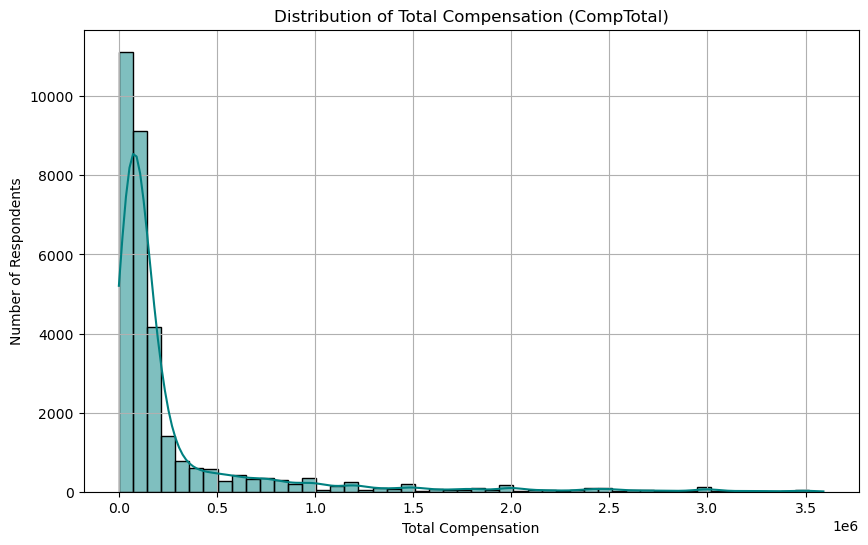

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (if not already loaded)
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(url)

# Drop missing or NaN values from CompTotal
comp_total = df['CompTotal'].dropna()

# Optional: Remove extreme outliers to improve plot readability
comp_total = comp_total[comp_total < comp_total.quantile(0.95)]

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(comp_total, bins=50, kde=True, color='teal')

plt.title('Distribution of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.show()


In [ ]:
Box Plots

Plot a box plot of Age.

In [11]:
# Map age groups to numeric values
# Define age group mapping
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

# Apply mapping to create a new numeric column
df['AgeNumeric'] = df['Age'].map(age_mapping)


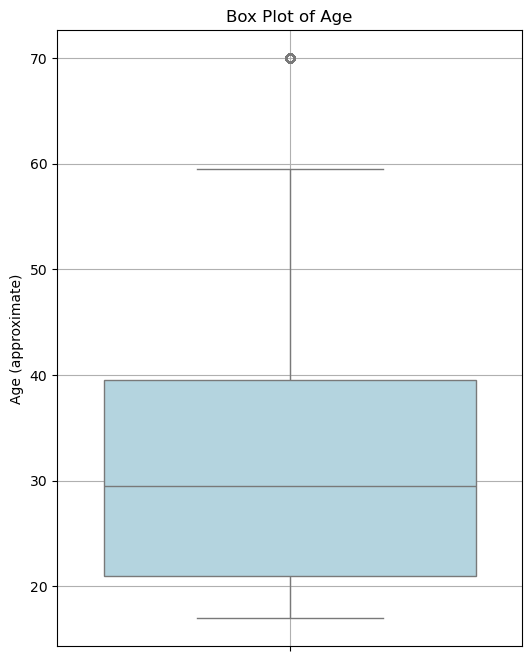

In [12]:
# Plot the box plot
import matplotlib.pyplot as plt
import seaborn as sns

# Drop missing values for clean plotting
age_data = df['AgeNumeric'].dropna()

# Plot
plt.figure(figsize=(6, 8))
sns.boxplot(y=age_data, color='lightblue')

plt.title('Box Plot of Age')
plt.ylabel('Age (approximate)')
plt.grid(True)
plt.show()


In [ ]:
Visualizing Relationships in Data
Scatter Plots

Create a scatter plot of Age and WorkExp.

In [13]:
#Map Age to numeric values (if not already done)
# Mapping age categories to numeric values
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

# Apply the mapping
df['AgeNumeric'] = df['Age'].map(age_mapping)


In [14]:
# Convert WorkExp to numeric and drop missing values
# Convert WorkExp to numeric
df['WorkExp'] = pd.to_numeric(df['WorkExp'], errors='coerce')

# Drop rows where either Age or WorkExp is missing
scatter_data = df[['AgeNumeric', 'WorkExp']].dropna()


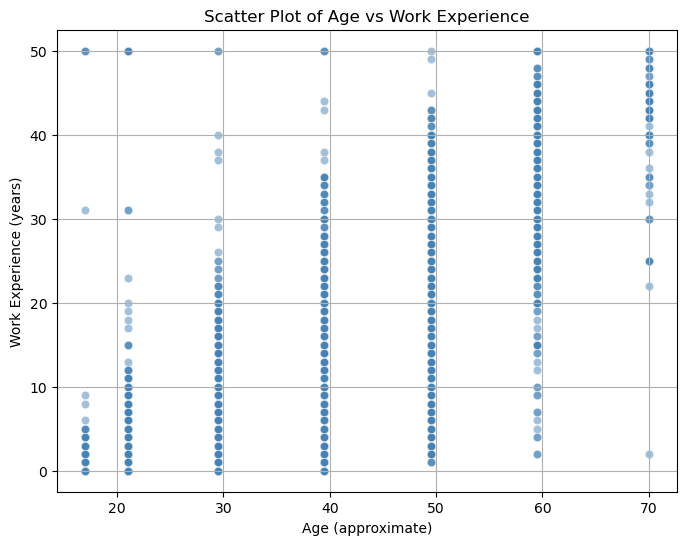

In [15]:
#  Create the scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=scatter_data, x='AgeNumeric', y='WorkExp', alpha=0.5, color='steelblue')

plt.title('Scatter Plot of Age vs Work Experience')
plt.xlabel('Age (approximate)')
plt.ylabel('Work Experience (years)')
plt.grid(True)
plt.show()


In [ ]:
Bubble Plots

Create a bubble plot of TimeSearching and Frustration using the Age column as the bubble size.

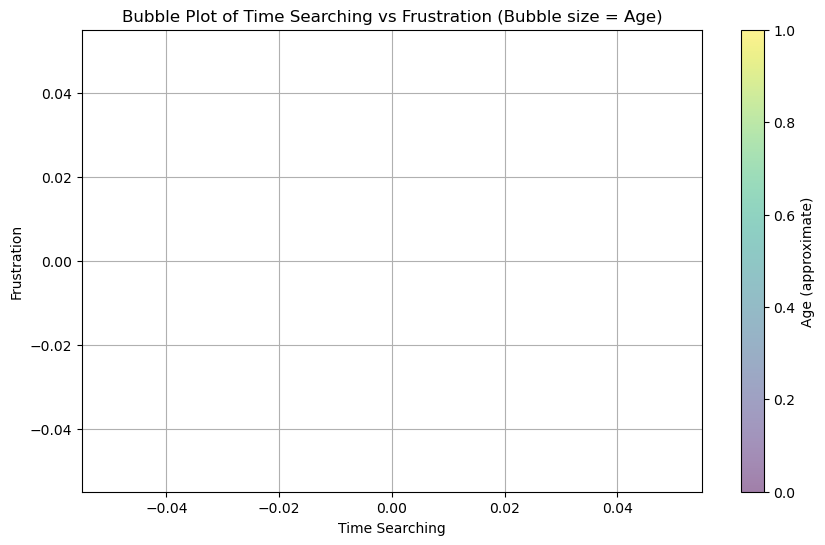

In [16]:
 import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded

# Age mapping (if not done yet)
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Convert to numeric
df['TimeSearching'] = pd.to_numeric(df['TimeSearching'], errors='coerce')
df['Frustration'] = pd.to_numeric(df['Frustration'], errors='coerce')

# Drop rows with missing values in these columns
plot_data = df[['TimeSearching', 'Frustration', 'AgeNumeric']].dropna()

# Normalize AgeNumeric for bubble size (optional, to scale bubbles nicely)
size = plot_data['AgeNumeric']
size_norm = (size - size.min()) / (size.max() - size.min()) * 1000 + 50  # scale sizes

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(
    plot_data['TimeSearching'],
    plot_data['Frustration'],
    s=size_norm,
    alpha=0.5,
    c=size,
    cmap='viridis',
    edgecolors='w',
    linewidth=0.5
)
plt.colorbar(label='Age (approximate)')
plt.xlabel('Time Searching')
plt.ylabel('Frustration')
plt.title('Bubble Plot of Time Searching vs Frustration (Bubble size = Age)')
plt.grid(True)
plt.show()


In [ ]:
Visualizing Composition of Data
Pie Charts

Create a pie chart of the top 5 databases(DatabaseWantToWorkWith) that respondents wish to learn next year.

In [17]:
# Count the top 5 most wanted databases
top5_db = df['DatabaseWantToWorkWith'].value_counts().head(5)

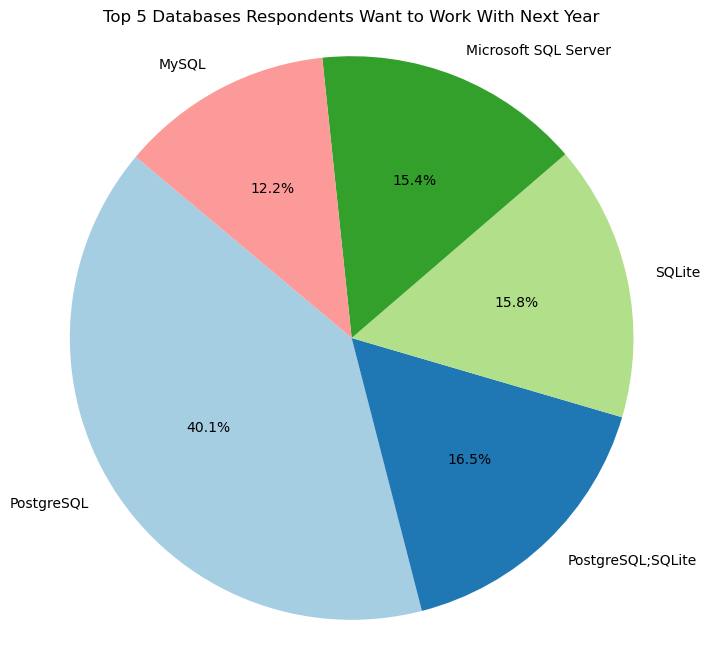

In [18]:
plt.figure(figsize=(8, 8))
plt.pie(
    top5_db,
    labels=top5_db.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('Top 5 Databases Respondents Want to Work With Next Year')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular.
plt.show()


In [ ]:
Stacked Charts

Create a stacked bar chart of median TimeSearching and TimeAnswering for the age group 30 to 35.

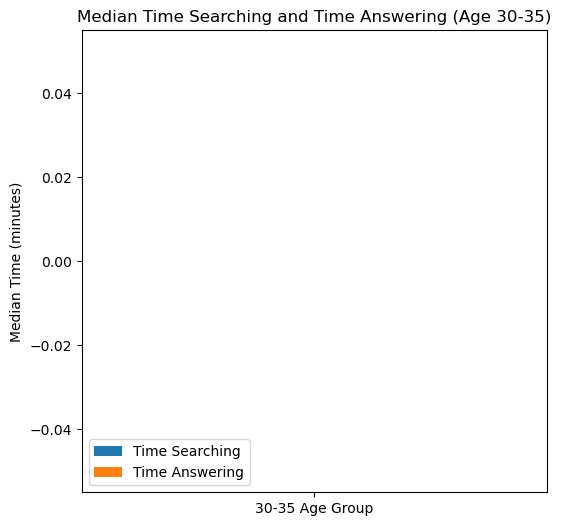

In [19]:
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Convert time columns to numeric
df['TimeSearching'] = pd.to_numeric(df['TimeSearching'], errors='coerce')
df['TimeAnswering'] = pd.to_numeric(df['TimeAnswering'], errors='coerce')

# Filter respondents roughly aged 30 to 35
# Since AgeNumeric are approximate, we pick 29.5 (25-34) and 39.5 (35-44) and filter between 29.5 and 39.5
age_filtered = df[(df['AgeNumeric'] >= 29.5) & (df['AgeNumeric'] <= 39.5)]

# Calculate medians
median_time_searching = age_filtered['TimeSearching'].median()
median_time_answering = age_filtered['TimeAnswering'].median()

# Prepare data for plotting
medians = [median_time_searching, median_time_answering]
labels = ['Time Searching', 'Time Answering']

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(6, 6))

ax.bar('30-35 Age Group', median_time_searching, label='Time Searching')
ax.bar('30-35 Age Group', median_time_answering, bottom=median_time_searching, label='Time Answering')

ax.set_ylabel('Median Time (minutes)')
ax.set_title('Median Time Searching and Time Answering (Age 30-35)')
ax.legend()
plt.show()

In [ ]:
Visualizing Comparison of Data
Line Chart

Plot the median CompTotal for all ages from 45 to 60.

['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']


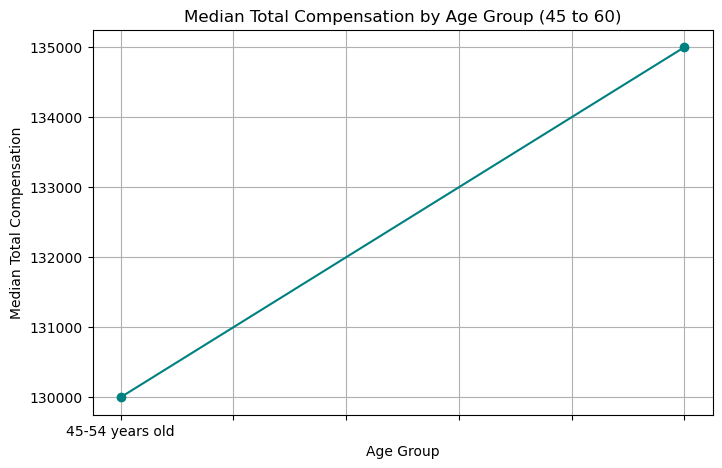

In [20]:
# Confirm Age categories
print(df['Age'].unique())

# Filter relevant age groups (these are categorical)
age_groups = ['45-54 years old', '55-64 years old']

# Filter data to only these age groups
age_filtered = df[df['Age'].isin(age_groups)]

# Calculate median CompTotal by Age
median_comp = age_filtered.groupby('Age')['CompTotal'].median()

# Sort by age order explicitly
median_comp = median_comp.reindex(age_groups)

# Plot line chart
plt.figure(figsize=(8, 5))
median_comp.plot(kind='line', marker='o', color='teal')
plt.title('Median Total Compensation by Age Group (45 to 60)')
plt.xlabel('Age Group')
plt.ylabel('Median Total Compensation')
plt.grid(True)
plt.show()

In [ ]:
Bar Chart

Create a horizontal bar chart using the MainBranch column.

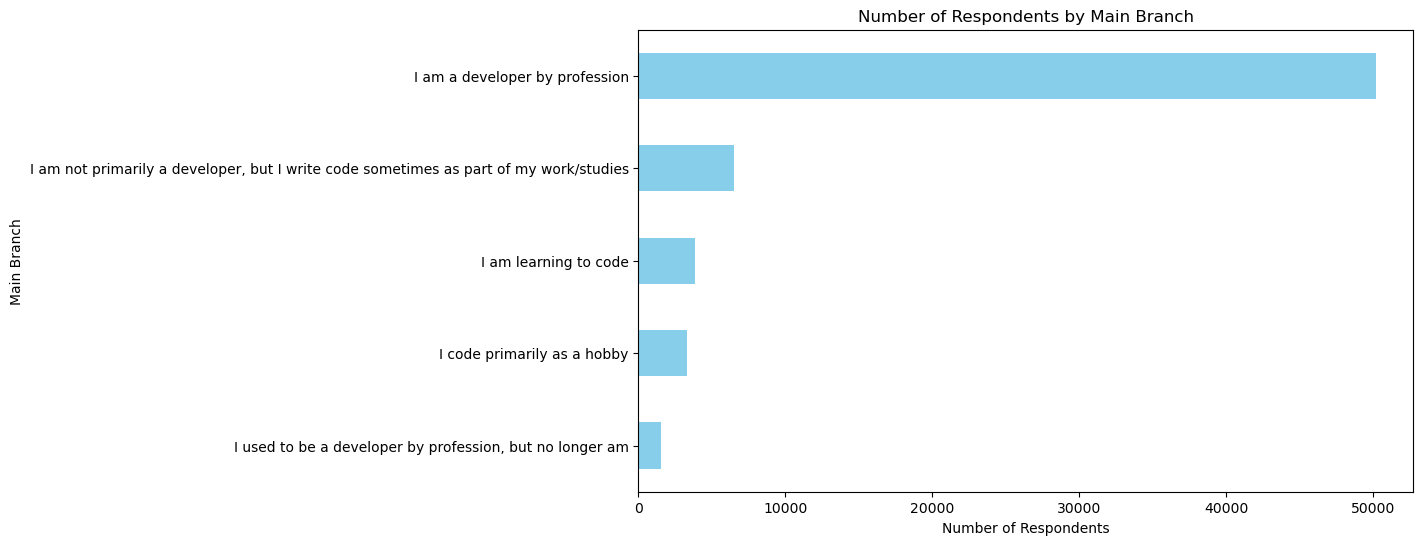

In [21]:
# Count values in MainBranch
main_branch_counts = df['MainBranch'].value_counts()

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
main_branch_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Respondents')
plt.ylabel('Main Branch')
plt.title('Number of Respondents by Main Branch')
plt.gca().invert_yaxis()  # Optional: to have the largest bar on top
plt.show()